# Pense como um Cientista de Dados
## Fundamentos de *Machine Learning* para Resolver Problemas
### Capítulo 03. O Processo de Aprendizagem
#### Estudo de Caso 2: Classificação de Clientes de Banco

# Estudo de Caso: Previsão de Subscrição de Depósito a Prazo
Neste estudo de caso, vamos reutilizar o dataset "Bank Marketing" da UCI, que já analisamos em **R**, e agora vamos realizar a mesma análise em **Python**. Começaremos com uma breve análise exploratória dos dados para entender melhor suas características.

## Carregando e Explorando os Dados
Primeiramente, vamos carregar o *dataset* e realizar uma análise exploratória inicial para entender a estrutura dos dados e algumas estatísticas descritivas.

### Carregando o Dataset em Python:

In [10]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO
from zipfile import ZipFile
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Carregar o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"

# Baixar o arquivo ZIP e extrair o CSV específico
response = requests.get(url)
zipfile = ZipFile(BytesIO(response.content))
data = pd.read_csv(zipfile.open('bank-full.csv'), sep=';')

#url = "https://raw.githubusercontent.com/penseemdados/machine-learning-book-scripts/main/EstudoCaso01/bank/bank-full.csv"
#data = pd.read_csv(url, sep=';')

In [2]:
# Visualizar as primeiras linhas do dataset
print(data.head())

# Estrutura do dataset
print(data.info())

# Resumo estatístico
print(data.describe())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

## Análise Exploratória
Vamos agora explorar algumas variáveis específicas do *dataset* para entender melhor sua distribuição e possíveis correlações.

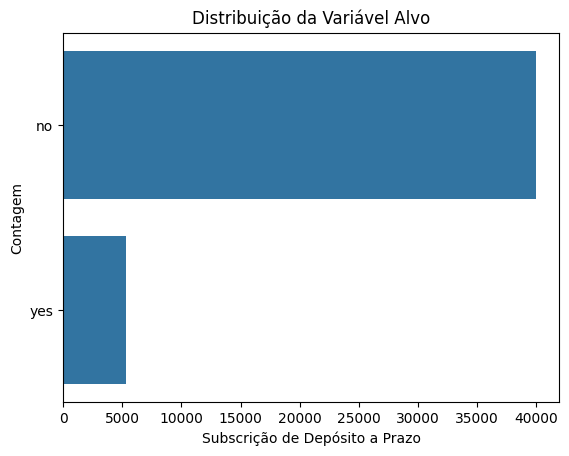

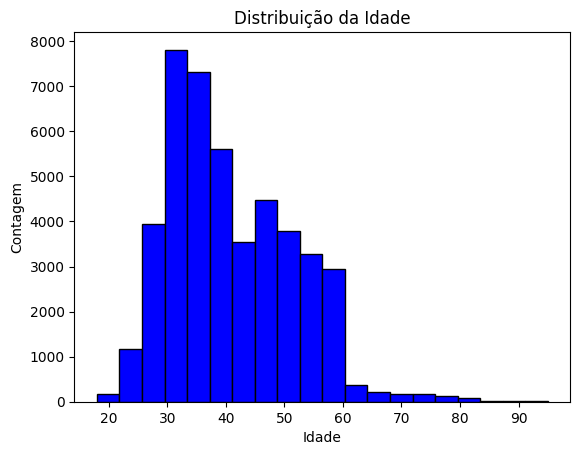

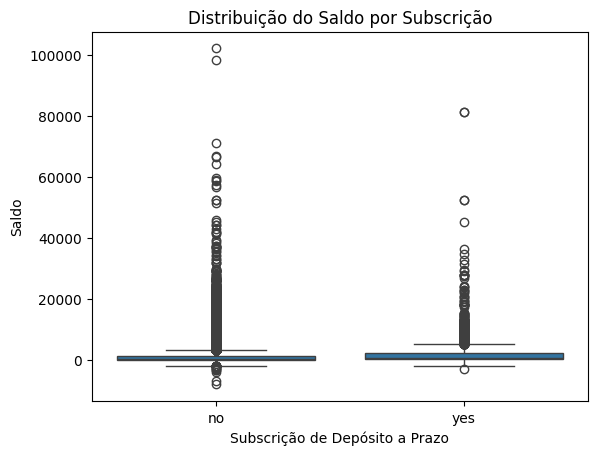

In [3]:
# Distribuição da variável alvo
sns.countplot(data['y'])
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Subscrição de Depósito a Prazo')
plt.ylabel('Contagem')
plt.show()

# Distribuição da idade
plt.hist(data['age'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

# Boxplot do saldo por subscrição
sns.boxplot(x='y', y='balance', data=data)
plt.title('Distribuição do Saldo por Subscrição')
plt.xlabel('Subscrição de Depósito a Prazo')
plt.ylabel('Saldo')
plt.show()

## Explicação:
- **Distribuição da variável alvo**: Mostra quantas pessoas subscreveram um depósito a prazo (variável y).
- **Distribuição da idade**: Visualiza a distribuição das idades dos clientes.
- **Boxplot do saldo por subscrição**: Compara o saldo bancário dos clientes que subscreveram e não subscreveram um depósito a prazo.

## Preparação dos Dados
Antes de construir os modelos, precisamos preparar os dados. Isso inclui transformar variáveis categóricas em variáveis *dummy*, transformar a variável alvo em 0 e 1, dividir o *dataset* em treino e teste, e padronizar os dados.

In [4]:
# Transformar variáveis categóricas em variáveis dummy
data = pd.get_dummies(data, drop_first=True)

# Transformar a variável alvo em 0 e 1
data['y'] = data['y_yes']
data = data.drop(columns=['y_yes'])

# Dividir o dataset em treino e teste
from sklearn.model_selection import train_test_split
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Explicação:
- **Transformação de variáveis categóricas**: Convertemos variáveis categóricas em variáveis *dummy* usando `get_dummies`.
- **Transformação da variável alvo**: Convertemos a variável alvo *y* em uma variável binária (0 e 1).
- **Divisão do *dataset***: Dividimos os dados em conjuntos de treino (70%) e teste (30%).
- **Padronização dos dados**: Ajustamos os dados para que todas as variáveis tenham a mesma escala.

## Construção e Avaliação de Modelos de *Machine Learning*
Vamos agora construir e avaliar modelos de *Machine Learning* utilizando os dados preparados, explorando conceitos como *overfitting* e *underfitting*.

### Modelo Simples
Primeiro, vamos construir um modelo simples utilizando **Regressão Logística**.

Modelo Simples
Acurácia no conjunto de treino: 0.9030239833159541
Acurácia no conjunto de teste: 0.899955765260985
Relatório de Classificação no conjunto de teste:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94     11966
        True       0.64      0.34      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



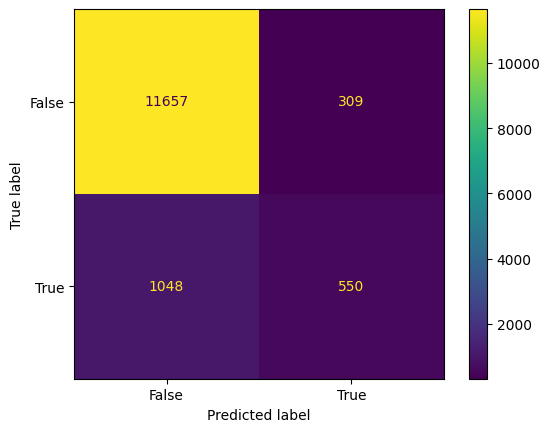

In [12]:
# Construir o modelo
modelo_simples = LogisticRegression(max_iter=1000)
modelo_simples.fit(X_train, y_train)

# Avaliar o modelo
y_train_pred_simples = modelo_simples.predict(X_train)
y_test_pred_simples = modelo_simples.predict(X_test)

print("Modelo Simples")
print(f"Acurácia no conjunto de treino: {accuracy_score(y_train, y_train_pred_simples)}")
print(f"Acurácia no conjunto de teste: {accuracy_score(y_test, y_test_pred_simples)}")
print("Relatório de Classificação no conjunto de teste:")
print(classification_report(y_test, y_test_pred_simples))

# Matriz de confusão
cm_simples = confusion_matrix(y_test, y_test_pred_simples, labels=modelo_simples.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_simples, display_labels=modelo_simples.classes_)
disp.plot()
plt.show()

## Explicação:

- **Construção do modelo**: Usamos Regressão Logística para criar um modelo simples.
- **Avaliação do modelo**: Calculamos a acurácia e o relatório de classificação para entender a performance do modelo.

### Modelo Complexo
Agora, vamos construir um modelo mais complexo utilizando uma ***Random Forest***.

Modelo Complexo
Acurácia no conjunto de treino: 0.9999368028565109
Acurácia no conjunto de teste: 0.9057800058979653
Relatório de Classificação no conjunto de teste:
              precision    recall  f1-score   support

       False       0.92      0.97      0.95     11966
        True       0.67      0.39      0.50      1598

    accuracy                           0.91     13564
   macro avg       0.80      0.68      0.72     13564
weighted avg       0.89      0.91      0.89     13564



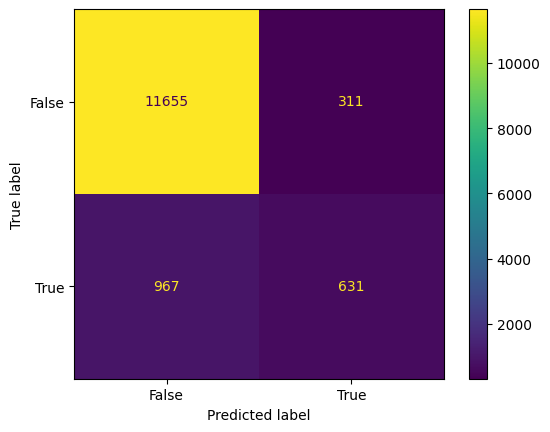

In [13]:
# Construir o modelo
modelo_complexo = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
modelo_complexo.fit(X_train, y_train)

# Avaliar o modelo
y_train_pred_complexo = modelo_complexo.predict(X_train)
y_test_pred_complexo = modelo_complexo.predict(X_test)

print("Modelo Complexo")
print(f"Acurácia no conjunto de treino: {accuracy_score(y_train, y_train_pred_complexo)}")
print(f"Acurácia no conjunto de teste: {accuracy_score(y_test, y_test_pred_complexo)}")
print("Relatório de Classificação no conjunto de teste:")
print(classification_report(y_test, y_test_pred_complexo))

# Matriz de confusão
cm_complexo = confusion_matrix(y_test, y_test_pred_complexo, labels=modelo_complexo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_complexo, display_labels=modelo_complexo.classes_)
disp.plot()
plt.show()

## Explicação:

- **Construção do modelo**: Usamos *Random Forest* para criar um modelo mais complexo.
- **Avaliação do modelo**: Calculamos a acurácia e o relatório de classificação para entender a performance do modelo.

## Discussão dos Resultados
### Modelo Simples:
- Acurácia no conjunto de treino: 0.90
- Acurácia no conjunto de teste: 0.90

### Modelo Complexo:
- Acurácia no conjunto de treino: 1.0
- Acurácia no conjunto de teste: 0.91

## Análise
- **Modelo Simples**: Apresenta uma boa acurácia tanto no conjunto de treino quanto no conjunto de teste, indicando uma boa generalização.
- **Modelo Complexo**: Apresenta alta acurácia em ambos os conjuntos, mas pode estar em risco de *overfitting* devido à sua alta performance nos dados de treino.

Neste estudo de caso, vimos como construir e avaliar modelos de *Machine Learning* utilizando um dataset real. Exploramos os conceitos de *overfitting* e *underfitting*, e vimos como diferentes modelos podem ter diferentes performances dependendo de sua complexidade. Nos próximos capítulos, exploraremos mais a fundo essas técnicas e estratégias para melhorar a performance dos modelos de *Machine Learning*. Continue acompanhando e aprimorando suas habilidades.